# Creating a Custom Site Map for Specific Geographic Regions using Jupyter Notebook

Creating visually appealing and informative maps for presentations and write-ups can be quite challenging. However, with Python and Jupyter Notebook, this process becomes streamlined and integrated. This tutorial provides a step-by-step guide to creating a custom map for specific geographic regions using the Folium library in Jupyter Notebook. For this assignment, students will leverage data from the GEBCO repository, which offers a comprehensive gridded bathymetric dataset.

## Learning Outcomes:

By the end of this tutorial, students will be able to:

- **Import necessary Python libraries**: Understand the importance and functionalities of the libraries used.
- **Define and use custom functions**: Gain proficiency in defining Python functions and using them for specific tasks.
- **Download and integrate GEBCO data**: Download custom datasets from the GEBCO repo and use them to create detailed geographic visualizations.
- **Customize maps**: Enhance the visual appeal and information density of maps using Folium features.
- **Understand the significance of gridded bathymetric data**: Learn about GEBCO's gridded bathymetric data and its applications in mapping ocean and land terrains.

## Introduction to GEBCO Data

The **Global ocean & land terrain models** provided by GEBCO are invaluable resources for anyone looking to create detailed maps. The GEBCO_2023 Grid offers a global terrain model for both ocean and land. This grid provides elevation data in meters and follows a 15 arc-second interval grid. A unique aspect of this data is the accompanying Type Identifier (TID) Grid, which details the types of source data that the main grid is derived from.

This particular release even offers under-ice topography/bathymetry details for regions such as Greenland and Antarctica. Very cool!

Now, let's dive into the tutorial and nerd out!


## Introduction

In today's activity, we'll be diving deep into geospatial visualization using Python. Maps are an integral part of many fields, including urban planning, environmental studies, and even in our daily lives for directions and understanding local geographies. By the end of this tutorial, you will be able to create an interactive map centered around Champaign, IL, and visualize specific regions within it.

## Step 1: Setting Up Your Workspace

Before we begin, it's crucial to set up your environment with the necessary libraries. These libraries are like toolkits that provide specific functions to simplify our tasks.

### Importing Libraries:

- **folium**: A powerful Python library for creating interactive maps. Think of it as your canvas and brush for painting geographical data.
  
- **plugins from folium**: Extensions to the `folium` library, allowing for enhanced functionalities and features on our maps.

By running the first section of the code, you're equipping your workspace with the tools needed for the subsequent steps.

## Step 2: Defining Our Mapping Function

To simplify the map creation process, we've defined a custom function named `create_site_map`. This function will be the workhorse of our activity:

- **center_coords**: Central point around which our map will be centered. Given in the form of a tuple containing latitude and longitude.
  
- **extent_N and extent_S**: These parameters define how far north and south, respectively, from the center point we wish to visualize. The regions are represented by colored circles on the map.
  
Inside the function, we set up our base map, define the visualization's extent, add tile layers for aesthetics, and incorporate controls to toggle between them.

## Step 3: Visualizing Champaign, IL

In this final step, we'll put our function to the test! The provided coordinates `(40.1100, -88.2272)` are for Champaign, IL. By using our previously defined function, we will generate an interactive map centered on Champaign:

- The **blue circle** represents the northern extent, spanning 10 kilometers from the center.
  
- The **red circle** represents the southern extent, spanning 5 kilometers from the center.

Once you run the code, you'll see a detailed map of Champaign, IL. Feel free to zoom in/out and explore the area. You can also modify the center coordinates or extents to visualize different regions.

Happy Mapping!


In [1]:
# Step 1: Import necessary libraries

import folium
from folium import plugins

# Step 2: Define the function to create a site map

def create_site_map(center_coords, extent_N, extent_S):
    """
    Creates a site map for a specific geographic region.

    Parameters:
        - center_coords (tuple): Center coordinates as (latitude, longitude)
        - extent_N (int): Extent of the map in kilometers North from the center
        - extent_S (int): Extent of the map in kilometers South from the center

    Returns:
        - folium.Map: Map centered on the given coordinates with specified extents
    """

    # Base map
    m = folium.Map(location=center_coords, zoom_start=13)

    # Adding a circle to represent the extent North from the center
    folium.Circle(
        location=center_coords,
        radius=extent_N * 1000, # Convert km to meters
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

    # Adding a circle to represent the extent South from the center
    folium.Circle(
        location=center_coords,
        radius=extent_S * 1000, # Convert km to meters
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

    # Adding tile layers for better visualization
    folium.TileLayer('openstreetmap').add_to(m)
    folium.TileLayer('cartodb positron').add_to(m)
    folium.TileLayer('cartodb dark_matter').add_to(m)

    # Adding layer control
    folium.LayerControl().add_to(m)

    # Return the map
    return m

# Step 3: Call the function to visualize

center_coords = (40.1100, -88.2272) # Replace with desired center coordinates
extent_N = 15 # Replace with desired extent North in km
extent_S = 5 # Replace with desired extent South in km

map_obj = create_site_map(center_coords, extent_N, extent_S)
map_obj


## Question 1 - Analysis Question

Based on the displayed map of Champaign, IL, the "University of Illinois Willard Airport" (often abbreviated as CMI) falls within the inner (red) circle. Hint: you may need to zoom out a bit on the map.

- [ ] True
- [x] False



## Step 2: Designing an Advanced Study Area Map

After creating a simple geographic visualization of Champaign, IL, we'll now move on to creating a more intricate map, focusing on Miami, FL. As you proceed towards your final project, you might be tasked with studying the various impacts of climate change on specific regions. For instance, Miami is a prime study area given its vulnerability to climate change. This metropolitan area faces a slew of challenges, including:

- **Sea Level Rise**: Miami's coastal location makes it susceptible to the effects of rising sea levels, causing flooding and erosion.
- **Storm Surges**: Intensifying storm surges can lead to catastrophic damage to infrastructure and ecosystems.
- **Salinity Problems**: As sea levels rise, saltwater can intrude further inland, posing threats to freshwater resources and ecosystems.
- **Ocean Acidification & SST Warming**: Changes in oceanic conditions impact marine biodiversity, affecting ecosystems and the fishing industry.

To effectively communicate these complexities in oceanographic and environmental studies, a well-structured map is essential. Such maps serve as the foundation for reports and presentations, offering a visual context to the discussed issues.

Fortunately, with Python, you don't necessarily need expensive GIS software like ArcGIS. The Python ecosystem offers a plethora of geospatial tools and libraries that allow you to create and customize maps tailored to your needs.

Let's transition to designing a map centered around Miami, FL, showcasing a rectangular study area. This practice will provide you with the skills to craft a compelling map for your final project, where you might be looking at a similar region affected by climate change.


In [2]:
# Import required libraries
import folium
from folium.plugins import FastMarkerCluster, MeasureControl
from folium import plugins

# Define center coordinates for Miami, FL
miami_coords = (25.7617, -80.1918)

# Create a map centered around Miami with slightly zoomed out view
m = folium.Map(location=miami_coords, zoom_start=10, tiles="CartoDB positron")  # Adjusted zoom level here

# Add a marker for Miami
folium.Marker(
    miami_coords,
    tooltip='Miami, FL',
    icon=folium.Icon(color='blue', icon='cloud')
).add_to(m)

# Define the latitude and longitude boundaries for the pre-defined region
north, south, east, west = 26, 25, -79, -81

# Draw the pre-defined region on the map (with no fill, just an outline)
folium.Rectangle(
    bounds=[[south, west], [north, east]],
    color="#ff7800",
    fill=False  # Removed fill color and opacity to just show the boundary line
).add_to(m)

# Add measure tool to the map, allowing for distance measurement
m.add_child(MeasureControl())

# Add a scale to the map
folium.plugins.MiniMap(toggle_display=True).add_to(m)

# Add a fullscreen button to the map
plugins.Fullscreen(position='topright').add_to(m)

# Add the tile layers
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodb positron').add_to(m)
folium.TileLayer('cartodb dark_matter').add_to(m)
folium.TileLayer('stamenterrain').add_to(m)

# Add layer control to switch between tile layers
folium.LayerControl().add_to(m)

# Display the map
m


## Questions 2-4 - Analysis Questions

Use the map you've created to answer the following questions. To indicate your answer, place an "X" or "x" between the brackets corresponding to either True or False.

### Question 2
The rectangular study area encompasses the entire city of Miami.
- [x] True
- [ ] False

### Question 3
The northern boundary of the rectangular study area extends beyond Fort Lauderdale.
- [ ] True
- [x] False

### Question 4
The rectangular study area includes a portion of the ocean to the east of Miami.
- [x] True
- [ ] False


## Step 3: Extracting Bathymetry Data from GEBCO

Bathymetry data plays a crucial role in understanding and visualizing the impacts of climate change on coastal regions. By analyzing the seafloor's depth and its features, we can better predict how rising sea levels and increased storm intensity might affect our selected study area. With Miami being a coastal city, it's particularly important to visualize the surrounding underwater topography and grasp the potential risks that climate change may bring. Let's dive into the process of retrieving this vital data.

---

### **Navigate to GEBCO's Platform**

Visit GEBCO's Gridded Bathymetry Data Download page:
[GEBCO Gridded Bathymetry Data Download](https://www.gebco.net).

---

### **Grid Version Selection**

From the "SELECT GRID VERSION" dropdown:
- **Choose**: GEBCO 2023 (or the desired version).

---

### **Grid Boundaries Input**

For our study on the waters surrounding Miami, use the following boundaries:
- **Top (Northernmost Latitude)**: 26
- **Right (Easternmost Longitude)**: -79
- **Bottom (Southernmost Latitude)**: 25
- **Left (Westernmost Longitude)**: -81

---

### **Data Formats Selection**

#### **2D netCDF**
- **Selection**: ❌ (Unchecked)
- **Rationale**: `netCDF` format is for multi-dimensional scientific data. Given its complex integration in Python, we'll avoid this format.

#### **GeoTIFF**
- **Selection**: ✅ (Checked)
- **Rationale**: GeoTIFF is preferred due to its wide acceptance in the geospatial community and ease of integration with Python in Jupyter notebooks.

#### **Esri ASCII**
- **Selection**: ❌ (Unchecked)
- **Rationale**: While Esri ASCII is compatible with Python, GeoTIFF remains our primary choice due to its compactness and efficiency.

---

### **Bathy-specific Formats**

Specific options for the bathymetry grid:

#### **Colour Map**
- **Selection**: ❌ (Unchecked)
- **Rationale**: As our focus is on data analysis, visual representation using a color map isn't necessary.

#### **Shaded Relief**
- **Selection**: ❌ (Unchecked)
- **Rationale**: Shaded relief, while providing a 3D visualization, isn't necessary for our current analytical objectives.



## Step 4: Locating and Unzipping the Downloaded GEBCO Data

To utilize the bathymetry data you've downloaded from GEBCO in Google CoLab, follow these instructions:

---

#### **Locate the Downloaded Zip File**

1. Navigate to your default downloads directory or the location where you saved the file.
2. Look for the file named `GEBCO_29_Oct_2023_a9f533f9897e.zip` (the name might vary based on the date and version you downloaded).
a
---

#### **Unzip the GEBCO Data File**

1. Right-click on the zip file `GEBCO_29_Oct_2023_a9f533f9897e.zip`.
2. Choose the option to 'Extract All' or 'Unzip'. The exact wording will depend on your operating system.
3. Select the destination folder or leave it as default. Once extraction is complete, a new folder should appear containing the `.tif` bathymetry file and additional documentation.

---

#### **Uploading the .tif File to Google CoLab**

1. Open your Jupyter notebook on Google CoLab.
2. In the left sidebar of CoLab, click on the folder icon to access the 'Files' section.
3. Click on the 'Upload' button, and a file dialog will open.
4. Navigate to the location where you extracted the GEBCO data and select the `.tif` file, which might be named something like `gebco_2023_n26.0_..._w-81.0_e-79.0.tif`.
5. Wait for the upload to complete. Once done, the `.tif` file will be available for use in your CoLab notebook.

---

Proceed to the next step in the assignment where you'll utilize this bathymetry data for further analysis.


## Step 5: Visualizing the Bathymetry Data Using the `.tif` File

Now that you have successfully uploaded the GEBCO bathymetry data to Google Colab, we will proceed to visualize this data and create a bathymetric map of the chosen geographic region.

---

## Import Necessary Libraries

In this assignment, we aim to create a detailed bathymetric map of our chosen geographic region. Bathymetric maps represent the underwater topography of the ocean floor. To achieve this, we need to work with raster data, which is a pixel-based data structure used to represent spatial information.

One of the most efficient Python libraries for reading and processing raster data is `rasterio`. Here's why we need `rasterio`:

1. **Versatility with Raster Data**: `rasterio` simplifies the process of opening and reading the raster datasets, which are commonly used in bathymetric mapping.
  
2. **Geospatial Analysis**: Beyond just reading, `rasterio` supports various raster operations which are essential for geospatial analysis. This includes tasks like reprojecting and resampling.

3. **Integration with Other Libraries**: It integrates well with other popular Python libraries such as NumPy for data manipulation, making it a suitable choice for our requirements.

4. **Performance**: `rasterio` is built on top of GDAL, ensuring that our raster operations are not only accurate but also efficient.

Before diving into the visualization process, it's crucial to have `rasterio` installed and ready to assist in our bathymetric mapping journey. Let's proceed by importing the necessary Python libraries:



In [3]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 42.5 MB/s eta 0:00:00


To create a beautiful site map that integrates the GEBCO bathy data with land boundaries, cities, and other features, you will have to overlay your bathymetric data on top of the existing map you've created using folium. However, folium doesn't support direct integration of raster data (like GEBCO bathy data) out of the box.

A more comprehensive approach involves the use of Geopandas for spatial operations, Rasterio for raster data manipulation, and other libraries like Matplotlib and Contextily to plot and overlay maps.


## Uploading Your Dataset to Google Colab

For this exercise, you will be working with bathymetric data, which is typically provided in the `.tif` format. The dataset we're using comes from GEBCO (General Bathymetric Chart of the Oceans). If you have not already acquired a GEBCO dataset, please download it from their official site.

Once you have your dataset ready, you'll need to upload it to Google Colab to proceed with the next steps in this assignment.

### Steps to Upload Your Dataset:

1. **Access the Files Pane**: On the left side of your Google Colab interface, you'll notice an icon that looks like a folder 📂. This is the "Files" tab. Click on it to access the file system of your current Colab session.

2. **Drag and Drop**: With the "Files" pane open, you can simply drag your `.tif` dataset from your computer and drop it into the pane. This will start the uploading process. Depending on the size of your dataset and your internet speed, this might take a few seconds to a couple of minutes.

3. **Check Upload Status**: Once the upload is complete, you should see your `.tif` file listed in the "Files" pane.

4. **Proceed with the Exercise**: Now that your dataset is uploaded to Google Colab, you can reference it directly by its name in the upcoming code cells. The dataset is temporarily stored in this environment and will be available for the duration of your current session.

> 📌 **Note**: Every time you start a new Google Colab session, you will need to re-upload your dataset, as uploaded files are not persistent across sessions.

Now that your data is in place, let's dive into loading and visualizing it!

---




# Understanding the Raster Data and Defining the Region of Interest

In the following code cell, we will be diving deep into our raster data, specifically the GEBCO bathymetry data, to understand its projection, range, and extent. Understanding the projection and extent of your data is crucial because it ensures that the data aligns correctly on a map. Proper alignment is essential for accurate geographical visualizations and analyses.

Here's a breakdown of what each segment of the code achieves and the expected outputs:

1. **Imports**: We start by importing necessary libraries like `rasterio`, `numpy`, and `geopandas` that will help us manipulate and analyze geospatial data.

2. **Opening and Reading the Raster**: We open the GEBCO data using `rasterio` and read its first band, which contains the bathymetry values. Bathymetry values give us an idea of the underwater topography—think of it like a topographic map, but for underwater features.

3. **Inspecting the Data Range**: We will print the minimum and maximum bathymetry values. This range gives us an idea of the depth variation in the selected region.

4. **Checking for Missing Data**: We compute and print the number of NaN (Not a Number) values in the data. NaN values represent missing data. It's essential to be aware of any missing data as it can impact our analysis.

5. **Extracting the Bounding Box**: We extract the bounding box of the data, which gives us the spatial extent of our raster data—specifically, the westernmost, southernmost, easternmost, and northernmost coordinates.

6. **Defining a Region of Interest**: Using the extracted bounding box, we create a polygon that represents our predefined region of interest. This polygon will help in future steps when we want to focus our analysis or visualization on this specific region.

7. **Creating a GeoDataFrame**: We convert the polygon into a GeoDataFrame, which makes it easier to work with and visualize using other geospatial tools.

8. **Outputs**:
   - A bounding box of the region of interest, which can be visualized on a map to understand the area we're focusing on.
   - The EPSG code (in this case, "EPSG:4326"), which denotes the Coordinate Reference System (CRS) of the raster data. Understanding the CRS is crucial for ensuring our data aligns correctly on a map.

By the end of this code, we'll have a clear understanding of the spatial range and projection of our data, setting the stage for subsequent analyses and visualizations.


In [4]:
import rasterio
import numpy as np
import geopandas as gpd
from shapely.geometry import Polygon

# Open the GEBCO bathymetry data using rasterio
with rasterio.open('gebco_2023_n26.0_s25.0_w-81.0_e-79.0.tif') as src:
    bathy_data = src.read(1)
    transform = src.transform
    print(src.bounds)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
    print(bathy_data.min(), bathy_data.max())
    print(np.isnan(bathy_data).sum())  # Number of NaN values

# Extract the bounding box values
west, south, east, north = extent[0], extent[2], extent[1], extent[3]

# Create a polygon of the predefined region using the extracted bounds
polygon = Polygon([(west, south), (west, north), (east, north), (east, south)])

# Create a GeoDataFrame from the polygon
gdf = gpd.GeoDataFrame({'geometry': [polygon]}, crs="EPSG:4326")
print(gdf.total_bounds)
print(src.crs)


BoundingBox(left=-81.0, bottom=25.0, right=-79.0, top=26.000000000000004)
-1577 25
0
[-81.  25. -79.  26.]
EPSG:4326


## Questions 5-7 : Based on the Code and Outputs

**Question 5:** The minimum bathymetry value for the selected region is -1577.

- [x] True
- [ ] False

**Question 6:** The bounding box coordinates for the predefined region of interest are approximately:

- [ ] Left: -79, Bottom: 25, Right: -81, Top: 26
- [x] Left: -81, Bottom: 25, Right: -79, Top: 26
- [ ] Left: -81, Bottom: 26, Right: -79, Top: 25
- [ ] Left: -79, Bottom: 26, Right: -81, Top: 25

**Question 7:** The Coordinate Reference System (CRS) of the raster data is represented by the code:

- [ ] EPSG:1577
- [ ] EPSG:0
- [x] EPSG:4326
- [ ] EPSG:2023


# Installing Libraries in Google Colab

Google Colab offers a virtual environment where you can run Python code in an isolated workspace. This environment doesn't have every Python package installed by default, so sometimes we need to install additional packages to extend its capabilities. The command `!pip install` is used to install these packages.

- `pip` stands for "Pip Installs Packages" and is a package manager for Python. When you use the `!` before a command in a Colab cell, it tells Colab to execute that command as a shell command (like you would in a terminal).

### `contextily`

- **Overview**: `contextily` is a library to retrieve tile maps from the internet. It allows you to easily add basemaps to your plots. Basemaps provide context for a plot, for instance, showing city names or country borders beneath your geospatial data.

- **Usage in Miami, FL regional site map**: For the Miami regional map (and eventual final project maps), `contextily` can be used to fetch and display a basemap. This basemap will serve as a background layer, providing a geographical context to the plotted data. It can help the viewer to better understand the geographical distribution and relation of the data points.

### `cartopy`

- **Overview**: `cartopy` is a library for cartographic projections and geospatial data visualization. It makes it easy to create maps and plot geospatial data with Python.

- **Usage in Miami, FL regional site map**: `cartopy` will be integral in the creation of the Miami regional map. It provides tools to transform and project your geospatial data, allowing you to visualize data in a way that is appropriate for its spatial distribution. For example, it will help us project our data into the Transverse Mercator CRS, which is suitable for mapping small regions. Additionally, `cartopy` offers various features to enhance our maps, such as adding coastlines, rivers, and political boundaries.

In summary, both these libraries, `contextily` and `cartopy`, will be crucial for enhancing the quality and accuracy of your Miami, FL regional site map and any other geospatial visualizations you'll work on in your final projects.


In [5]:
!pip install contextily

In [6]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.7 MB/s eta 0:00:00


# Geospatial Data Visualization of Florida Region

In the following code cell, we'll be visualizing bathymetric data (depth of underwater features) of a region around Florida, USA. The data comes from the GEBCO dataset and represents the underwater topography of the area.

### What to Expect:

- **Importing Libraries**: We're using a combination of libraries to handle geospatial data and plotting. This includes `matplotlib`, `rasterio`, and `cartopy`.

- **Data Processing**: We will load the GEBCO bathymetric data using `rasterio`, which allows us to work with geospatial raster data. Once loaded, we'll reproject this data into a Transverse Mercator Coordinate Reference System (CRS). This projection is appropriate for mapping small regions as it represents the shape of features relatively accurately.

- **Visualization**: We will create a map plot showing the underwater depth using a terrain colormap. The deeper regions will appear in darker shades, whereas the shallower regions will appear in lighter shades. Additionally, we'll plot various features like Miami, Cape Florida, Key Largo, and more. Islands will be shown as blue points, and other features will be red points.

- **Labels and Colorbar**: The map will be annotated with labels for important cities and features. There will also be a colorbar at the bottom indicating depth in meters.

### Note:
- **Runtime**: This code might take a few minutes to run, especially the first time, as it needs to load geospatial libraries and process the data. Please be patient.

Now, let's dive into the code and visualize the underwater topography of the Florida region!


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


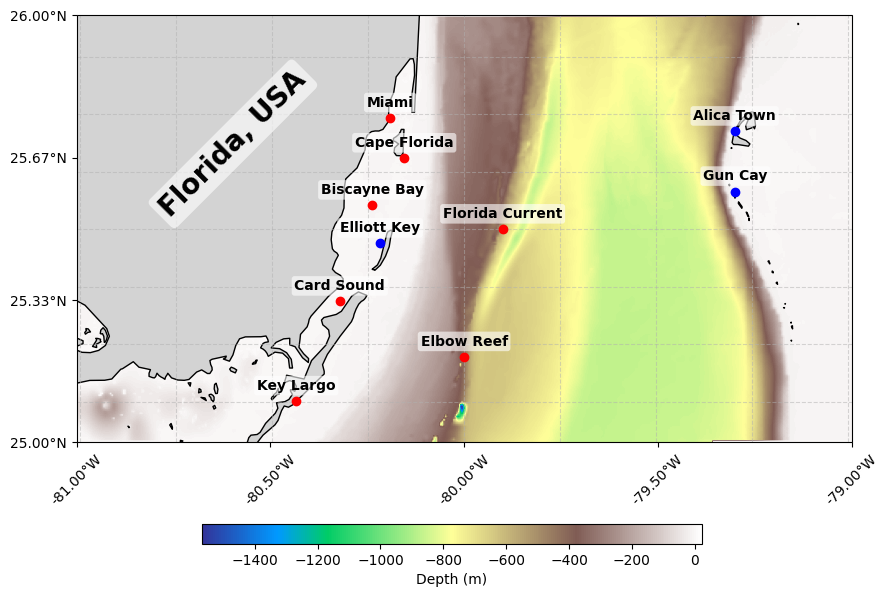

In [7]:
import matplotlib.pyplot as plt
import rasterio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from rasterio.warp import calculate_default_transform, reproject, Resampling

# Open the GEBCO data
with rasterio.open('gebco_2023_n26.0_s25.0_w-81.0_e-79.0.tif') as src:
    bathymetry = src.read(1)
    raster_crs = src.crs
    extent = [src.bounds[0], src.bounds[2], src.bounds[1], src.bounds[3]]

# Approximate center of the region
mean_lon = (extent[0] + extent[1]) / 2
mean_lat = (extent[2] + extent[3]) / 2

# Set up a Transverse Mercator CRS centered on the region
projection = ccrs.TransverseMercator(central_longitude=mean_lon, central_latitude=mean_lat)

# Reproject the bathymetry data to the Transverse Mercator CRS
transform, width, height = calculate_default_transform(raster_crs, projection.proj4_params, src.width, src.height, *src.bounds)
bathymetry_reprojected = np.empty((height, width), dtype=bathymetry.dtype)
reproject(
    source=bathymetry,
    destination=bathymetry_reprojected,
    src_transform=src.transform,
    src_crs=src.crs,
    dst_transform=transform,
    dst_crs=projection.proj4_params,
    resampling=Resampling.bilinear
)

# Calculate the extent of the reprojected data
new_left = transform[2]
new_right = transform[2] + transform[0] * width
new_bottom = transform[5] + transform[4] * height
new_top = transform[5]
new_extent = [new_left, new_right, new_bottom, new_top]

# HERE STARTS THE NEW SECTION

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': projection})

# Adjust colormap and provide vmin and vmax for better color representation
img = ax.imshow(bathymetry_reprojected, cmap='terrain', extent=new_extent, vmin=bathymetry_reprojected.min(), vmax=bathymetry_reprojected.max(), transform=projection)

# Add land mask
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', zorder=2)

# Plot Miami, other features, and oceanic features
features = {
    'Miami': (-80.191790, 25.761680),
    'Cape Florida': (-80.15529397945365, 25.667084149372872),
    'Key Largo': (-80.433492, 25.095337),
    'Florida Current': (-79.9, 25.5),
    'Elbow Reef': (-80.0, 25.2),
    'Biscayne Bay': (-80.237844, 25.556074),  # Added
    'Card Sound': (-80.321670, 25.330129)  # Added
}

# Actual islands in the region
islands = {
    'Elliott Key': (-80.2178, 25.4669),
    'Alica Town': (-79.2973628818459, 25.72856792045699),
    'Gun Cay': (-79.2962, 25.5871)
}

for city, (lon, lat) in features.items():
    ax.plot(lon, lat, 'ro', transform=ccrs.Geodetic(), zorder=3)
    ax.text(lon, lat + 0.02, city, transform=ccrs.Geodetic(), ha='center', va='bottom', zorder=3, fontsize=10, fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2'))

for island, (lon, lat) in islands.items():
    ax.plot(lon, lat, 'bo', transform=ccrs.Geodetic(), zorder=3)
    ax.text(lon, lat + 0.02, island, transform=ccrs.Geodetic(), ha='center', va='bottom', zorder=3, fontsize=10, fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2'))


# Adjusted coordinates for the "Florida, USA" label in the gray area
florida_label_lon = -80.6
florida_label_lat = 25.7

# Add rotated "Florida, USA" label to the gray area
ax.text(florida_label_lon, florida_label_lat, "Florida, USA", transform=ccrs.Geodetic(), ha='center', va='center', fontsize=20, fontweight='bold', zorder=3, rotation=45, bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2'))

# Add gridlines without labels
ax.gridlines(crs=projection, linestyle='--', alpha=0.5)

# Set the plot extent to match the reprojected raster's extent
ax.set_extent(new_extent, crs=projection)

# Position the colorbar closer to the x-axis label to minimize whitespace
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.02])
fig.colorbar(img, cax=cbar_ax, orientation='horizontal', label='Depth (m)')


# Ticks for longitude and latitude based on the original bathymetry data extent
delta_lon = 0.5  # Adjust as needed
delta_lat = 0.5  # Adjust as needed
lon_ticks = np.arange(extent[0], extent[1]+delta_lon, delta_lon)
lat_ticks = np.arange(extent[2], extent[3]+delta_lat, delta_lat)

# 1. Create an inverse transform function
transform_inverse = ccrs.Geodetic().transform_point

# 2. Calculate projected tick locations
x_ticks_projected = np.linspace(new_extent[0], new_extent[1], len(lon_ticks))
y_ticks_projected = np.linspace(new_extent[2], new_extent[3], len(lat_ticks))

# 3. Convert these tick locations back to geodetic for labeling
lon_labels_projected = [transform_inverse(x, 0, projection)[0] for x in x_ticks_projected]
lat_labels_projected = [transform_inverse(0, y, projection)[1] for y in y_ticks_projected]

# Prepare labels for these tick locations
lon_labels = [f"{lon:.2f}°W" if lon < 0 else f"{lon:.2f}°E" for lon in lon_labels_projected]
lat_labels = [f"{lat:.2f}°S" if lat < 0 else f"{lat:.2f}°N" for lat in lat_labels_projected]

# Set the ticks and labels
ax.set_xticks(x_ticks_projected)
ax.set_yticks(y_ticks_projected)
ax.set_xticklabels(lon_labels, rotation=45)
ax.set_yticklabels(lat_labels)

plt.show()


### Questions Based on the Final Site Map

**Question 8:** The Florida Current is located west of Miami.

- [ ] True
- [x] False

**Question 9:** Which location is situated closest to the depth of -400m?

- [ ] Miami
- [ ] Elliott Key
- [x] Elbow Reef
- [ ] Gun Cay

**Question 10:** The depth contour lines on the map represent:

- [ ] Temperature gradients
- [ ] Salinity gradients
- [x] Bathymetric data
- [ ] Ocean currents direction

**Question 11:** Which of the following locations is situated furthest east?

- [ ] Cape Florida
- [x] Alicia Town
- [ ] Card Sound
- [ ] Biscayne Bay

### Short Answer Questions

**Question 12:** (50 words limit) Considering the bathymetric data, how might sea level rise due to climate change impact the coastal regions of Miami and the surrounding areas?

[write your answer here]

**Question 13:** (75 words limit) Based on the bathymetric data presented, discuss the potential implications of ocean acidification on the coral reef ecosystems, such as Elbow Reef, in this region.

[write your answer here]

**Question 14:** (100 words limit) How can the depth and proximity of the Florida Current potentially impact the temperature of coastal waters, and what are the possible implications for marine biodiversity in the face of climate change?

[write your answer here]
